<div id="container" style="position:relative;">
<div style="float:left"><h1> Data Preprocessing and Modeling</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

This notebook is a continuation of the Data Prep and Exploration code-along. In Data Prep and Exploration we were introduced to the Bank Marketing dataset and motivated by the following question:

> How do customers who registered for the term deposit product differ from those who did not? This can be in terms of customer demographics or in terms of features of the current and prior marketing campaign. 

We cleaned the data and conducted some basic EDA to begin answering this question.

Now that we have some statistical modeling techniques under our belt, can we address the same question above, but using these new tools? Will we find different insights about the problem and the data? We can also extend the above problem statement to be more predictive in nature: 
>Given demographic and other data about customers at the bank, can we predict the likelihood that they will register for the term deposit product?


#### Data Dictionary

As a refresher, take some time to study the data dictionary below. This will be a useful reference if we are ever confused about what a particular column of data means.

Demographic & client data:
- age (numeric)
- job (categorical)
- marital: marital status (categorical, note: 'divorced' means divorced or widowed)
- education (categorical)
- credit_in_default: has credit in default? (categorical)
- housing_loan: has housing loan? (categorical)
- personal_loan: has personal loan? (categorical)

Data about the calls from *this* campaign:
- last_contact_type: contact communication type (categorical)
- last_contact_month: last contact month of year (categorical)
- last_contact_day: last contact day of the week (categorical)
- last_contact_duration: last contact duration, in seconds (numeric)
- last_contact_duration_mins: last contact duration, in minutes (numeric)
- n_contacts_this_campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Data about calls from *previous* campaigns:
- n_contacts_prev_campaign: number of contacts performed before this campaign and for this client (numeric)
- prev_campaign_outcome: outcome of the previous marketing campaign (categorical)

Field of interest:
- registered: has the client registered for a term deposit?


___

**Question:** What statistical methods would you expect to use here?

- logistic regression for modeling the relationship between registration status and the other features;
- hypothesis testing for determining if the effects are significant.

---

### Part 1: Data Preprocessing

We pick up where we left off by importing the cleaned bank marketing dataset and re-acquanting ourselves with the variables present in the data.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Read in the data and refresh our memories
df = pd.read_csv('bank-marketing-dataset-cleaned.csv')

In [70]:
df.sample(10)

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,n_contacts_prev_campaign,prev_campaign_outcome,registered,location
6139,36.0,admin.,married,university.degree,no,yes,no,cellular,aug,mon,258.0,3,0,nonexistent,no,Tavira
4724,55.0,retired,married,university.degree,no,no,no,cellular,jul,fri,659.0,2,0,nonexistent,no,São João da Madeira
480,39.0,management,married,university.degree,no,no,no,cellular,aug,fri,155.0,1,0,nonexistent,no,Valongo
1547,28.0,admin.,married,university.degree,no,yes,no,cellular,jun,thu,73.0,1,1,failure,no,Águeda
5362,37.0,technician,married,high.school,no,yes,no,telephone,jun,tue,232.5,4,0,nonexistent,no,Covilhã
856,69.0,blue-collar,married,unknown,no,yes,no,cellular,aug,tue,232.5,3,0,nonexistent,no,Ílhavo
590,53.0,admin.,single,unknown,no,yes,no,telephone,jun,mon,63.0,1,0,nonexistent,no,Quarteira
2037,45.0,blue-collar,married,basic.6y,unknown,no,no,telephone,jun,thu,333.0,1,0,nonexistent,no,Águeda
4481,49.0,unemployed,married,basic.4y,unknown,yes,no,telephone,jul,tue,275.0,4,0,nonexistent,no,Viseu
10039,58.0,retired,divorced,high.school,no,no,no,cellular,aug,thu,232.5,2,1,failure,yes,Covilhã


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11669 non-null  object 
 6   personal_loan             11669 non-null  object 
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

In [72]:
df.isna().sum().sum()

0

In [73]:
df.duplicated().sum() #will not catch redundant data

0

## Our output variable for modelling will be `registered`:

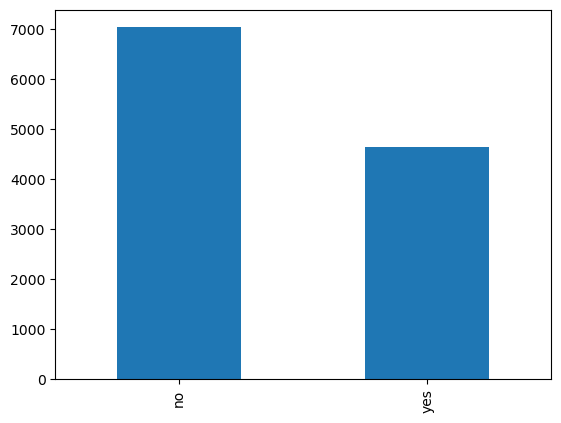

In [74]:
df['registered'].value_counts().plot(kind='bar');

Why is imbalance bad:
 - The more imbalance you have the less relevant accuracy is as a valuation metric - we will learn ways to deal with this
 - If we have less samples to learn from then the model will see less variations of that class and thus not be as good at picking that class out


In [75]:
7000/11600

0.603448275862069

In [76]:
df['registered'] = np.where(df['registered'] == 'yes', 1, 0)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  object 
 5   housing_loan              11669 non-null  object 
 6   personal_loan             11669 non-null  object 
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

In [78]:
df['marital'].value_counts() 

married     6397
single      3343
divorced    1189
unknown      740
Name: marital, dtype: int64

### We will have to convert `marital` into numbers -> we don't want to simply have {`married` : 0, `single` : 1 .. } since this is a nominal categorical variable (it has no order)

In [79]:
df['credit_in_default'].value_counts() #1 `yes` is simply not enough to learn from so we map it away

no         9648
unknown    2020
yes           1
Name: credit_in_default, dtype: int64

In [80]:
df['credit_in_default'] = df['credit_in_default'].map({'no':0,'unknown':1,'yes':1})

In [81]:
df['credit_in_default']

0        0
1        0
2        1
3        0
4        0
        ..
11664    0
11665    0
11666    0
11667    0
11668    0
Name: credit_in_default, Length: 11669, dtype: int64

In [82]:
df['credit_in_default'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11669 entries, 0 to 11668
Series name: credit_in_default
Non-Null Count  Dtype
--------------  -----
11669 non-null  int64
dtypes: int64(1)
memory usage: 91.3 KB


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  int64  
 5   housing_loan              11669 non-null  object 
 6   personal_loan             11669 non-null  object 
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

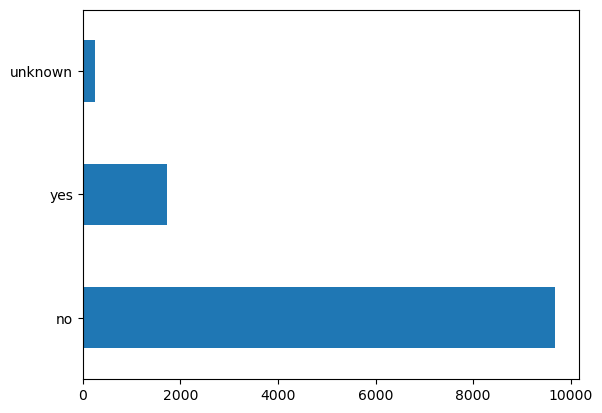

In [84]:
df['personal_loan'].value_counts().plot(kind='barh');

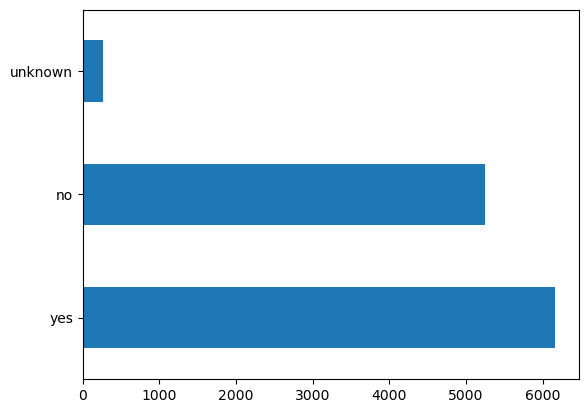

In [85]:
df['housing_loan'].value_counts().plot(kind='barh');

In [86]:
df['personal_loan'] = df['personal_loan'].map({'no':0, 'yes':1, 'unknown':0})

In [87]:
df['housing_loan'] = df['housing_loan'].map({'no':0, 'yes':1, 'unknown':0})

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  int64  
 5   housing_loan              11669 non-null  int64  
 6   personal_loan             11669 non-null  int64  
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

In [89]:
df.shape

(11669, 16)

In [90]:
df['education'].value_counts()

university.degree      3412
high.school            2556
basic.9y               1471
professional.course    1358
unknown                1215
basic.4y               1067
basic.6y                583
illiterate                7
Name: education, dtype: int64

In [91]:
df['education'] = df['education'].map({'university.degree':'university.degree',
                                       'high.school':'high.school',
                                       'basic.9y' : 'basic',
                                       'basic.4y' : 'basic',
                                       'basic.6y' : 'basic',
                                       'unknown' : 'unknown',
                                       'illiterate' : 'unknown',
                                       'professional.course': 'professional.course'
})

### Assumption: We assumed that `education` basic could all be clumped together since it all the education that happens prior to highschool. We might revisit this later if education ends up being a very strong predictor of `registered`

In [92]:
df['education'].value_counts()

university.degree      3412
basic                  3121
high.school            2556
professional.course    1358
unknown                1222
Name: education, dtype: int64

In [93]:
df['education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11669 entries, 0 to 11668
Series name: education
Non-Null Count  Dtype 
--------------  ----- 
11669 non-null  object
dtypes: object(1)
memory usage: 91.3+ KB


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  int64  
 5   housing_loan              11669 non-null  int64  
 6   personal_loan             11669 non-null  int64  
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

### There is no order to `cellular` vs `telephone`.  We don't want to assign 1 or 0 to these jsut yet!

<AxesSubplot:>

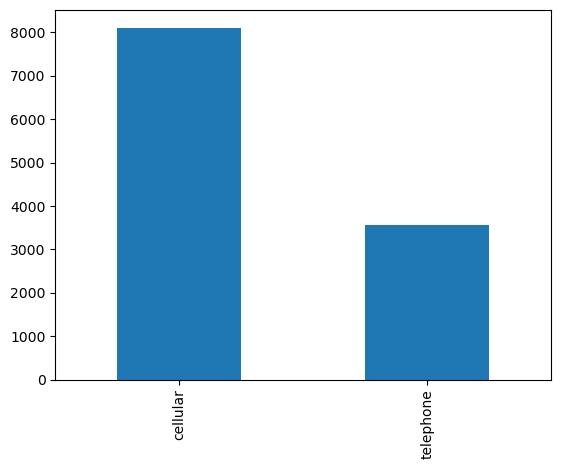

In [95]:
df['last_contact_type'].value_counts().plot(kind='bar')

In [96]:
df['prev_campaign_outcome'].value_counts() #don't want to turn into 0,1,2

nonexistent    9388
failure        1302
success         979
Name: prev_campaign_outcome, dtype: int64

<AxesSubplot:>

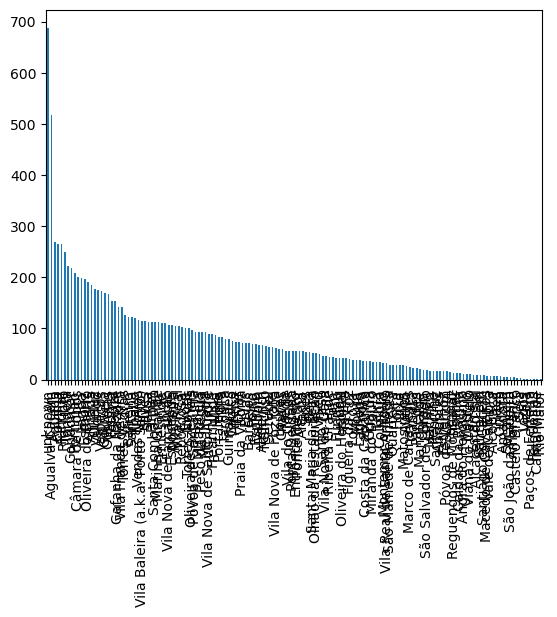

In [97]:
df['location'].value_counts().plot(kind='bar')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  int64  
 5   housing_loan              11669 non-null  int64  
 6   personal_loan             11669 non-null  int64  
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  object 
 9   last_contact_day          11669 non-null  object 
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

In [99]:
# Jan - 1 , Dec - 12
# Monday - 1 ---> Sunday - 7

In [100]:
df['last_contact_month'] = df['last_contact_month'].map({'jan':1,
                              'feb':2,
                              'mar':3,
                              'apr':4,
                              'may':5,
                              'jun':6,
                              'jul':7,
                              'aug':8,
                              'sep':9,
                              'oct':10,
                              'nov':11,
                              'dec':12
})

In [101]:
df['last_contact_month'].value_counts()

5     3361
7     1909
8     1722
6     1488
11    1090
4      943
10     398
3      333
9      319
12     106
Name: last_contact_month, dtype: int64

In [102]:
df['last_contact_day'].value_counts()

thu    2544
wed    2354
mon    2322
tue    2260
fri    2189
Name: last_contact_day, dtype: int64

In [103]:
df['last_contact_day'] = df['last_contact_day'].map({'tue':2, 'mon':1, 'thu':4, 'wed':3, 'fri':5}).value_counts()

### woopsie made a mistake, regenrate the raw `last_contact_day`

In [104]:
df2 = pd.read_csv('bank-marketing-dataset-cleaned.csv')

In [105]:
df['last_contact_day'] = df2['last_contact_day']

In [106]:
df['last_contact_day'].value_counts()

thu    2544
wed    2354
mon    2322
tue    2260
fri    2189
Name: last_contact_day, dtype: int64

In [107]:
df['last_contact_day'] = df['last_contact_day'].map({'tue':2, 'mon':1, 'thu':4, 'wed':3, 'fri':5})

In [108]:
df['last_contact_day'].value_counts()

4    2544
3    2354
1    2322
2    2260
5    2189
Name: last_contact_day, dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11669 non-null  float64
 1   job                       11669 non-null  object 
 2   marital                   11669 non-null  object 
 3   education                 11669 non-null  object 
 4   credit_in_default         11669 non-null  int64  
 5   housing_loan              11669 non-null  int64  
 6   personal_loan             11669 non-null  int64  
 7   last_contact_type         11669 non-null  object 
 8   last_contact_month        11669 non-null  int64  
 9   last_contact_day          11669 non-null  int64  
 10  last_contact_duration     11669 non-null  float64
 11  n_contacts_this_campaign  11669 non-null  int64  
 12  n_contacts_prev_campaign  11669 non-null  int64  
 13  prev_campaign_outcome     11669 non-null  object 
 14  regist

#### Dummy Variables

To numerically represent catregorical variables with many nominal distinct values we can use ***dummy variables***. A dummy variable is a binary variable that takes values of 0 and 1, where the values indicate the presence or absence of something. A categorical variable that has more than two categories can be represented by a set of dummy variables, with one variable being used to indicate the presense/absence for each category. 

Dummy variables are also known as ***One-hot encoding*** since only one of the dummy variables for each category can have a value of 1 at a time. 

                    `NY` `Texas` 
NY ---------------  [1,   [0,
Boston -----------   0,    0,
Texas ------------   0]    1]

In [110]:
states = pd.Series(['NY','Boston','Texas','NY'])
states


0        NY
1    Boston
2     Texas
3        NY
dtype: object

In [111]:
pd.get_dummies(states)

,Boston,NY,Texas
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0


### Note: if you want to have non-mutally exclusive nonimal categories then we use the `transactional encoder`

In [112]:
df['marital'].value_counts()

married     6397
single      3343
divorced    1189
unknown      740
Name: marital, dtype: int64

In [113]:
df['marital']

0        divorced
1         married
2         unknown
3         married
4         married
           ...   
11664     married
11665     married
11666     married
11667     married
11668     married
Name: marital, Length: 11669, dtype: object

In [114]:
pd.get_dummies(df['marital'])

,divorced,married,single,unknown
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
11664,0,1,0,0
11665,0,1,0,0
11666,0,1,0,0
11667,0,1,0,0


In [115]:
pd.get_dummies(df['last_contact_type'])

,cellular,telephone
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
11664,1,0
11665,1,0
11666,1,0
11667,1,0


In [116]:
df['last_contact_type'].map({'cellular':1,'telephone':0})

0        1
1        1
2        1
3        1
4        0
        ..
11664    1
11665    1
11666    1
11667    1
11668    1
Name: last_contact_type, Length: 11669, dtype: int64

In [117]:
pd.get_dummies(df.select_dtypes('object')).shape

(11669, 174)

In [118]:
# Drop location column from the original dataframe adds lots of columns that we'd rather not deal with for now
df.drop('location', axis=1, inplace=True)

In [119]:
pd.get_dummies(df).shape

(11669, 36)

In [120]:
dummy_df = pd.get_dummies(df)

In [121]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                11669 non-null  float64
 1   credit_in_default                  11669 non-null  int64  
 2   housing_loan                       11669 non-null  int64  
 3   personal_loan                      11669 non-null  int64  
 4   last_contact_month                 11669 non-null  int64  
 5   last_contact_day                   11669 non-null  int64  
 6   last_contact_duration              11669 non-null  float64
 7   n_contacts_this_campaign           11669 non-null  int64  
 8   n_contacts_prev_campaign           11669 non-null  int64  
 9   registered                         11669 non-null  int64  
 10  job_admin.                         11669 non-null  uint8  
 11  job_blue-collar                    11669 non-null  uin

In [122]:
df.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student,divorced,unknown,0,0,0,cellular,5,2,244.0,3,0,nonexistent,0
1,34.0,services,married,professional.course,0,0,0,cellular,5,1,190.0,3,0,nonexistent,0
2,43.0,housemaid,unknown,unknown,1,1,1,cellular,7,4,97.0,2,0,nonexistent,0
3,75.0,retired,married,basic,0,0,0,cellular,10,3,113.0,2,0,nonexistent,0
4,58.0,retired,married,unknown,0,0,0,telephone,5,2,174.0,1,0,nonexistent,0


In [123]:
df.marital.value_counts()

married     6397
single      3343
divorced    1189
unknown      740
Name: marital, dtype: int64

In [124]:
pd.get_dummies(df['marital'], drop_first=True)

,married,single,unknown
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
11664,1,0,0
11665,1,0,0
11666,1,0,0
11667,1,0,0


For refrence category, we try to drop a class that doesn't provide a lot of information to our model and our model can't learn a lot from that independent variable. 

In [59]:
df['job'].value_counts()

admin.           2889
blue-collar      2180
technician       1768
services         1010
management        779
unknown           777
retired           644
student           369
self-employed     356
entrepreneur      327
unemployed        288
housemaid         282
Name: job, dtype: int64

In [60]:
df.education.value_counts()

university.degree      3412
basic                  3121
high.school            2556
professional.course    1358
unknown                1222
Name: education, dtype: int64

In [61]:
df.last_contact_type.value_counts()

cellular     8111
telephone    3558
Name: last_contact_type, dtype: int64

In [62]:
df['prev_campaign_outcome'].value_counts()

nonexistent    9388
failure        1302
success         979
Name: prev_campaign_outcome, dtype: int64

In [128]:
# Since we have only two classes, I will use map function to covert the largest class to 1 and the other one to 0

df['last_contact_type'] = df['last_contact_type'].map({'cellular':1,'telephone':0})

In [129]:
df.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student,divorced,unknown,0,0,0,1,5,2,244.0,3,0,nonexistent,0
1,34.0,services,married,professional.course,0,0,0,1,5,1,190.0,3,0,nonexistent,0
2,43.0,housemaid,unknown,unknown,1,1,1,1,7,4,97.0,2,0,nonexistent,0
3,75.0,retired,married,basic,0,0,0,1,10,3,113.0,2,0,nonexistent,0
4,58.0,retired,married,unknown,0,0,0,0,5,2,174.0,1,0,nonexistent,0


In [130]:
dummy_df = pd.get_dummies(df)

In [131]:
# Let's now look at dummy_df with all of the dummy variables
dummy_df.head()


,age,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,n_contacts_prev_campaign,...,marital_single,marital_unknown,education_basic,education_high.school,education_professional.course,education_university.degree,education_unknown,prev_campaign_outcome_failure,prev_campaign_outcome_nonexistent,prev_campaign_outcome_success
0,38.0,0,0,0,1,5,2,244.0,3,0,...,0,0,0,0,0,0,1,0,1,0
1,34.0,0,0,0,1,5,1,190.0,3,0,...,0,0,0,0,1,0,0,0,1,0
2,43.0,1,1,1,1,7,4,97.0,2,0,...,0,1,0,0,0,0,1,0,1,0
3,75.0,0,0,0,1,10,3,113.0,2,0,...,0,0,1,0,0,0,0,0,1,0
4,58.0,0,0,0,0,5,2,174.0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [132]:
#Creating the reference categories
reference_categories = ['job_unknown', 'marital_unknown', 'education_unknown',
                       'prev_campaign_outcome_nonexistent']  

In [134]:
dummy_df.drop(columns = reference_categories, inplace=True)

In [136]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            11669 non-null  float64
 1   credit_in_default              11669 non-null  int64  
 2   housing_loan                   11669 non-null  int64  
 3   personal_loan                  11669 non-null  int64  
 4   last_contact_type              11669 non-null  int64  
 5   last_contact_month             11669 non-null  int64  
 6   last_contact_day               11669 non-null  int64  
 7   last_contact_duration          11669 non-null  float64
 8   n_contacts_this_campaign       11669 non-null  int64  
 9   n_contacts_prev_campaign       11669 non-null  int64  
 10  registered                     11669 non-null  int64  
 11  job_admin.                     11669 non-null  uint8  
 12  job_blue-collar                11669 non-null 

### Part 2: Modeling

Now that we are satisfied our data is ready to be put into a model, we proceed to the model building phase of our analysis. First, we need to ensure that certain assumption hold about the data: these include our samples being independent and identically distributed, and that the independent variables are not collinear or show multicollinearity.

In [137]:
# Pull out the X and y (independent and dependent variables)
X = dummy_df.drop('registered', axis=1)
y = dummy_df['registered'].copy()

#### Collinearity & Multicollinearity

**Applies to:**

   - Linear & Logistic regression models

**What is it?**

- **Collinearity** refers to the situation when two independent variables are correlated with one another.
- **Multicollinearity** is the situation where one independent variable can be expressed as a linear combination of two or more other independent variables (in other words, the independent variables are in a linear relationship with *each other*).

**What does it do to our models?**

 - We often see certain independent variables be given much lower coefficients than what the correlation between that variable and the dependent variable would suggest. It may also go against our prior subject matter knowledge.
 
 - The coefficient standard errors may also be very high, suggesting that the model is unsure about its prediction.
 
 - As a result of both of the above, p-values are likely to be highly skewed, and may lead us to make incorrect conclusions about the significance of the variable. 
 
**Why does this happen?**

Fundamentally, linear regression models use how an independent variable varies with a dependent variable to estimate the coefficient value that describes the change in the $y$. This is why correlation between the independent variable and dependent variables is important to have. If there is a strong relationship the model can look at the data and say "Ah, if $x$ increases by 1, then $y$ generally increases by ~2"

In multiple linear regression, where we have multiple independent variables, we also need to factor in how the independent variables vary with *each other* as well as the dependent variable. Consider this extreme scenario:

   - Two independent variables $x_1$ and $x_2$ have very strong correlation with each other, |$\rho|\geq 0.9 $
   - Both variables variables share strong positive correlation with the dependent $y$, $\rho \approx 0.7 $

In the scenario above, the model will be unsure about which independent variable is the one that actually driving the relationship with the dependent variable. Ultimately both independent variables seem to move in the same way. 

The result of this confusion is that the model will assign the majority of the relationship to one of the variables, and assign little to the other. As a result, one coefficient value will be high and the other very low! This may not match up with what we would expect and lead us to make conclusions about the relationship between the independent variables and the dependent variable that do not reflect the true relationship.

#### Detecting Collinearity

Collinearity can be detected by finding the pairwise **correlation** between the independent variables (we typically visualize this as a heatmap). If a linear/logistic regression model is to be fitted, this should always be part of the exploratory phase. If the correlation between some predictors is high, it is a sign of collinearity and we can consider including only one of those predictors in our models (or to combine the information in those predictors some way).

Let us explore collinearity in our dataset.

In [138]:
X.head()

,age,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,n_contacts_prev_campaign,...,job_unemployed,marital_divorced,marital_married,marital_single,education_basic,education_high.school,education_professional.course,education_university.degree,prev_campaign_outcome_failure,prev_campaign_outcome_success
0,38.0,0,0,0,1,5,2,244.0,3,0,...,0,1,0,0,0,0,0,0,0,0
1,34.0,0,0,0,1,5,1,190.0,3,0,...,0,0,1,0,0,0,1,0,0,0
2,43.0,1,1,1,1,7,4,97.0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,75.0,0,0,0,1,10,3,113.0,2,0,...,0,0,1,0,1,0,0,0,0,0
4,58.0,0,0,0,0,5,2,174.0,1,0,...,0,0,1,0,0,0,0,0,0,0


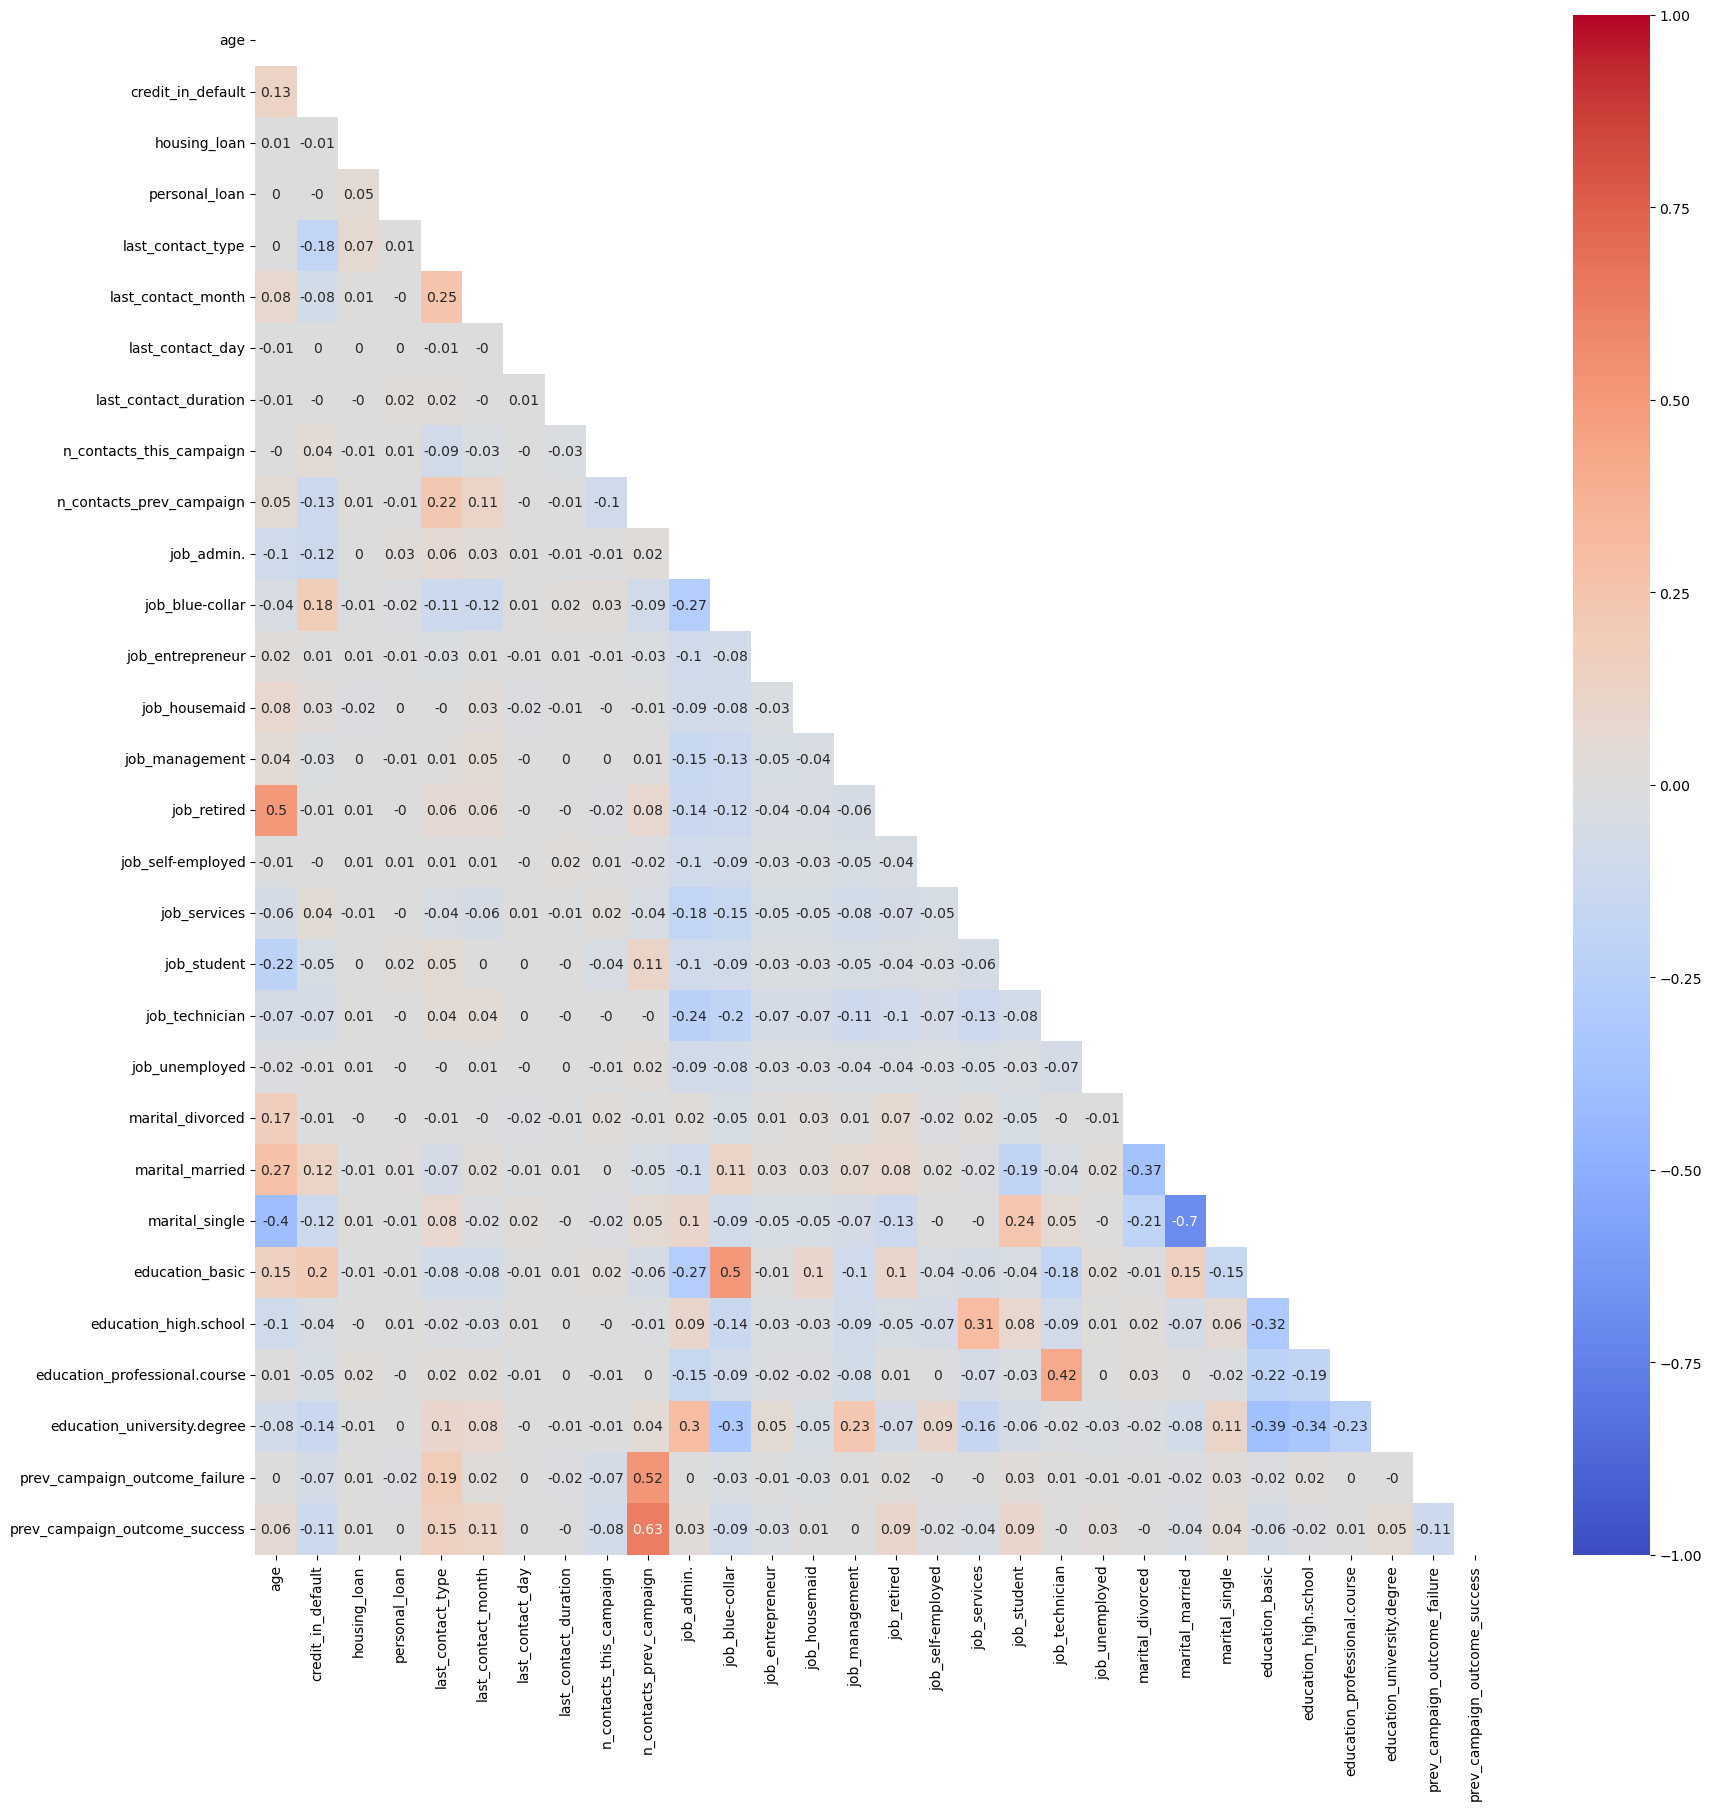

In [144]:
# Calculate all the correlations between each independent variables
corr_df = X.corr()

# Let's visulaize it

# Mask for upper-triangular
mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask, center=0)
plt.show()


In [146]:
X[['prev_campaign_outcome_success','n_contacts_prev_campaign']].describe()

,prev_campaign_outcome_success,n_contacts_prev_campaign
count,11669.000000,11669.000000
mean,0.083898,0.275945
std,0.277246,0.656542
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,6.000000


In [147]:
# Drop the identified columns as colliniear

X.drop(columns=['prev_campaign_outcome_success'], axis=1, inplace=True)

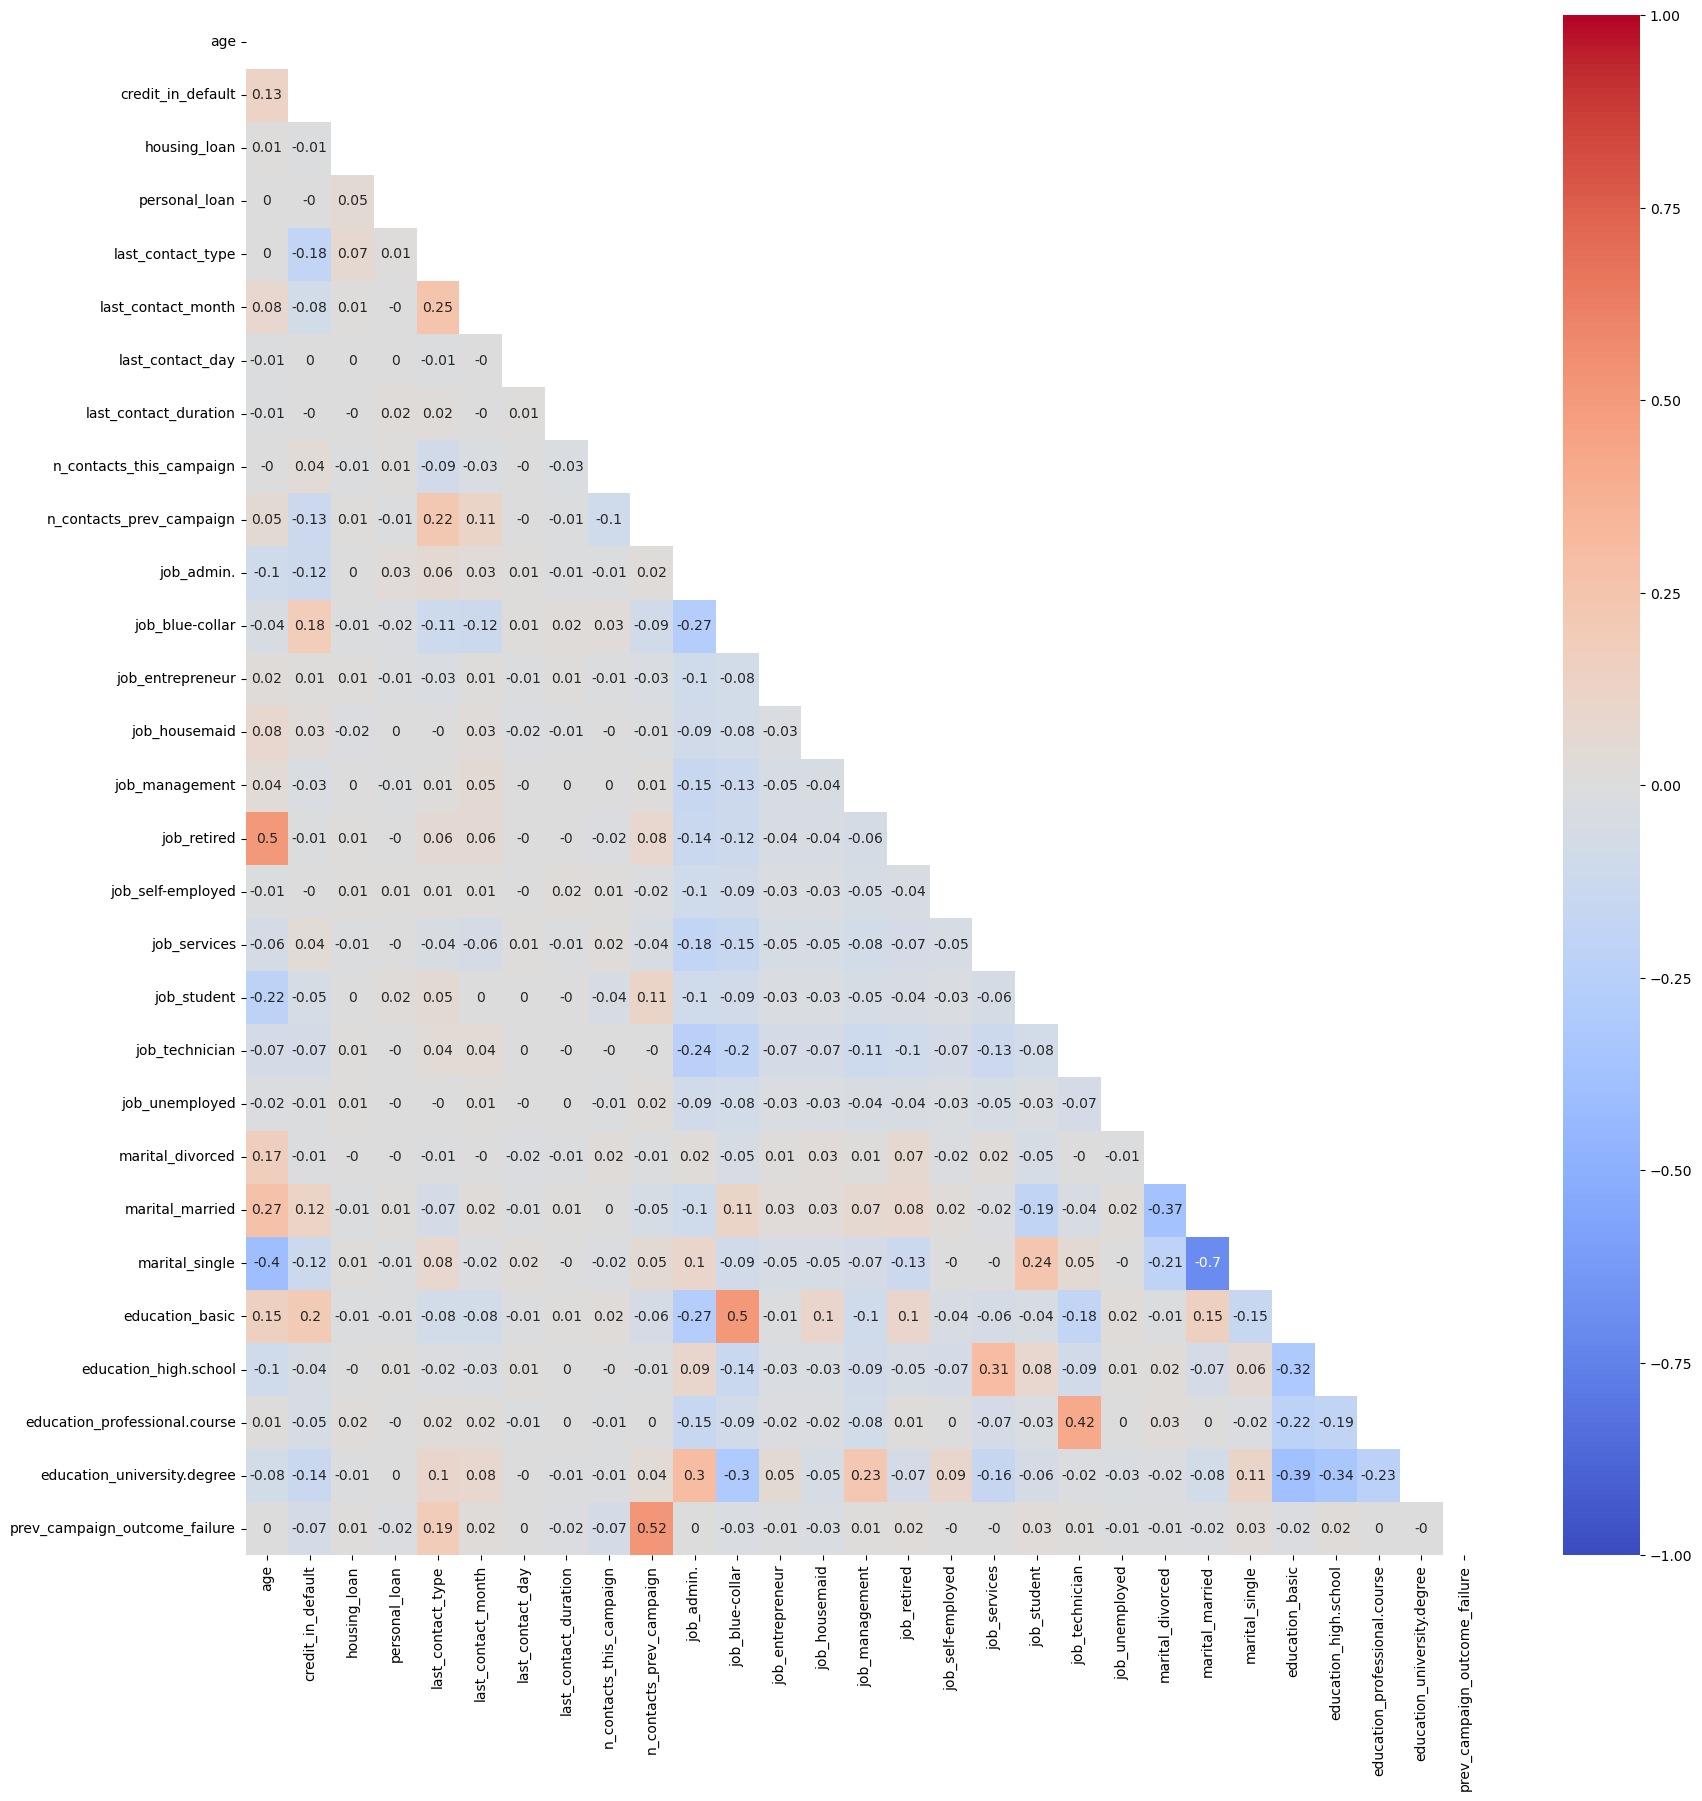

In [148]:
# Calculate all the correlations between each independent variables
corr_df = X.corr()

# Let's visulaize it

# Mask for upper-triangular
mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask, center=0)
plt.show()


To drop columns, we could look at variance and the amount of information that column is providing to our model. In the below case, we can see that std of marital_single is lower, and also we have less number of rows with marital_single. So it is a better case to drop.

In [149]:

X[['marital_single', 'marital_married']].describe()

,marital_single,marital_married
count,11669.000000,11669.000000
mean,0.286486,0.548205
std,0.452138,0.497692
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [150]:
X[['marital_single', 'marital_married']].sum()

marital_single     3343
marital_married    6397
dtype: int64

In [151]:
# Drop the identified columns as colliniear

X.drop(columns=['marital_single'], axis=1, inplace=True)

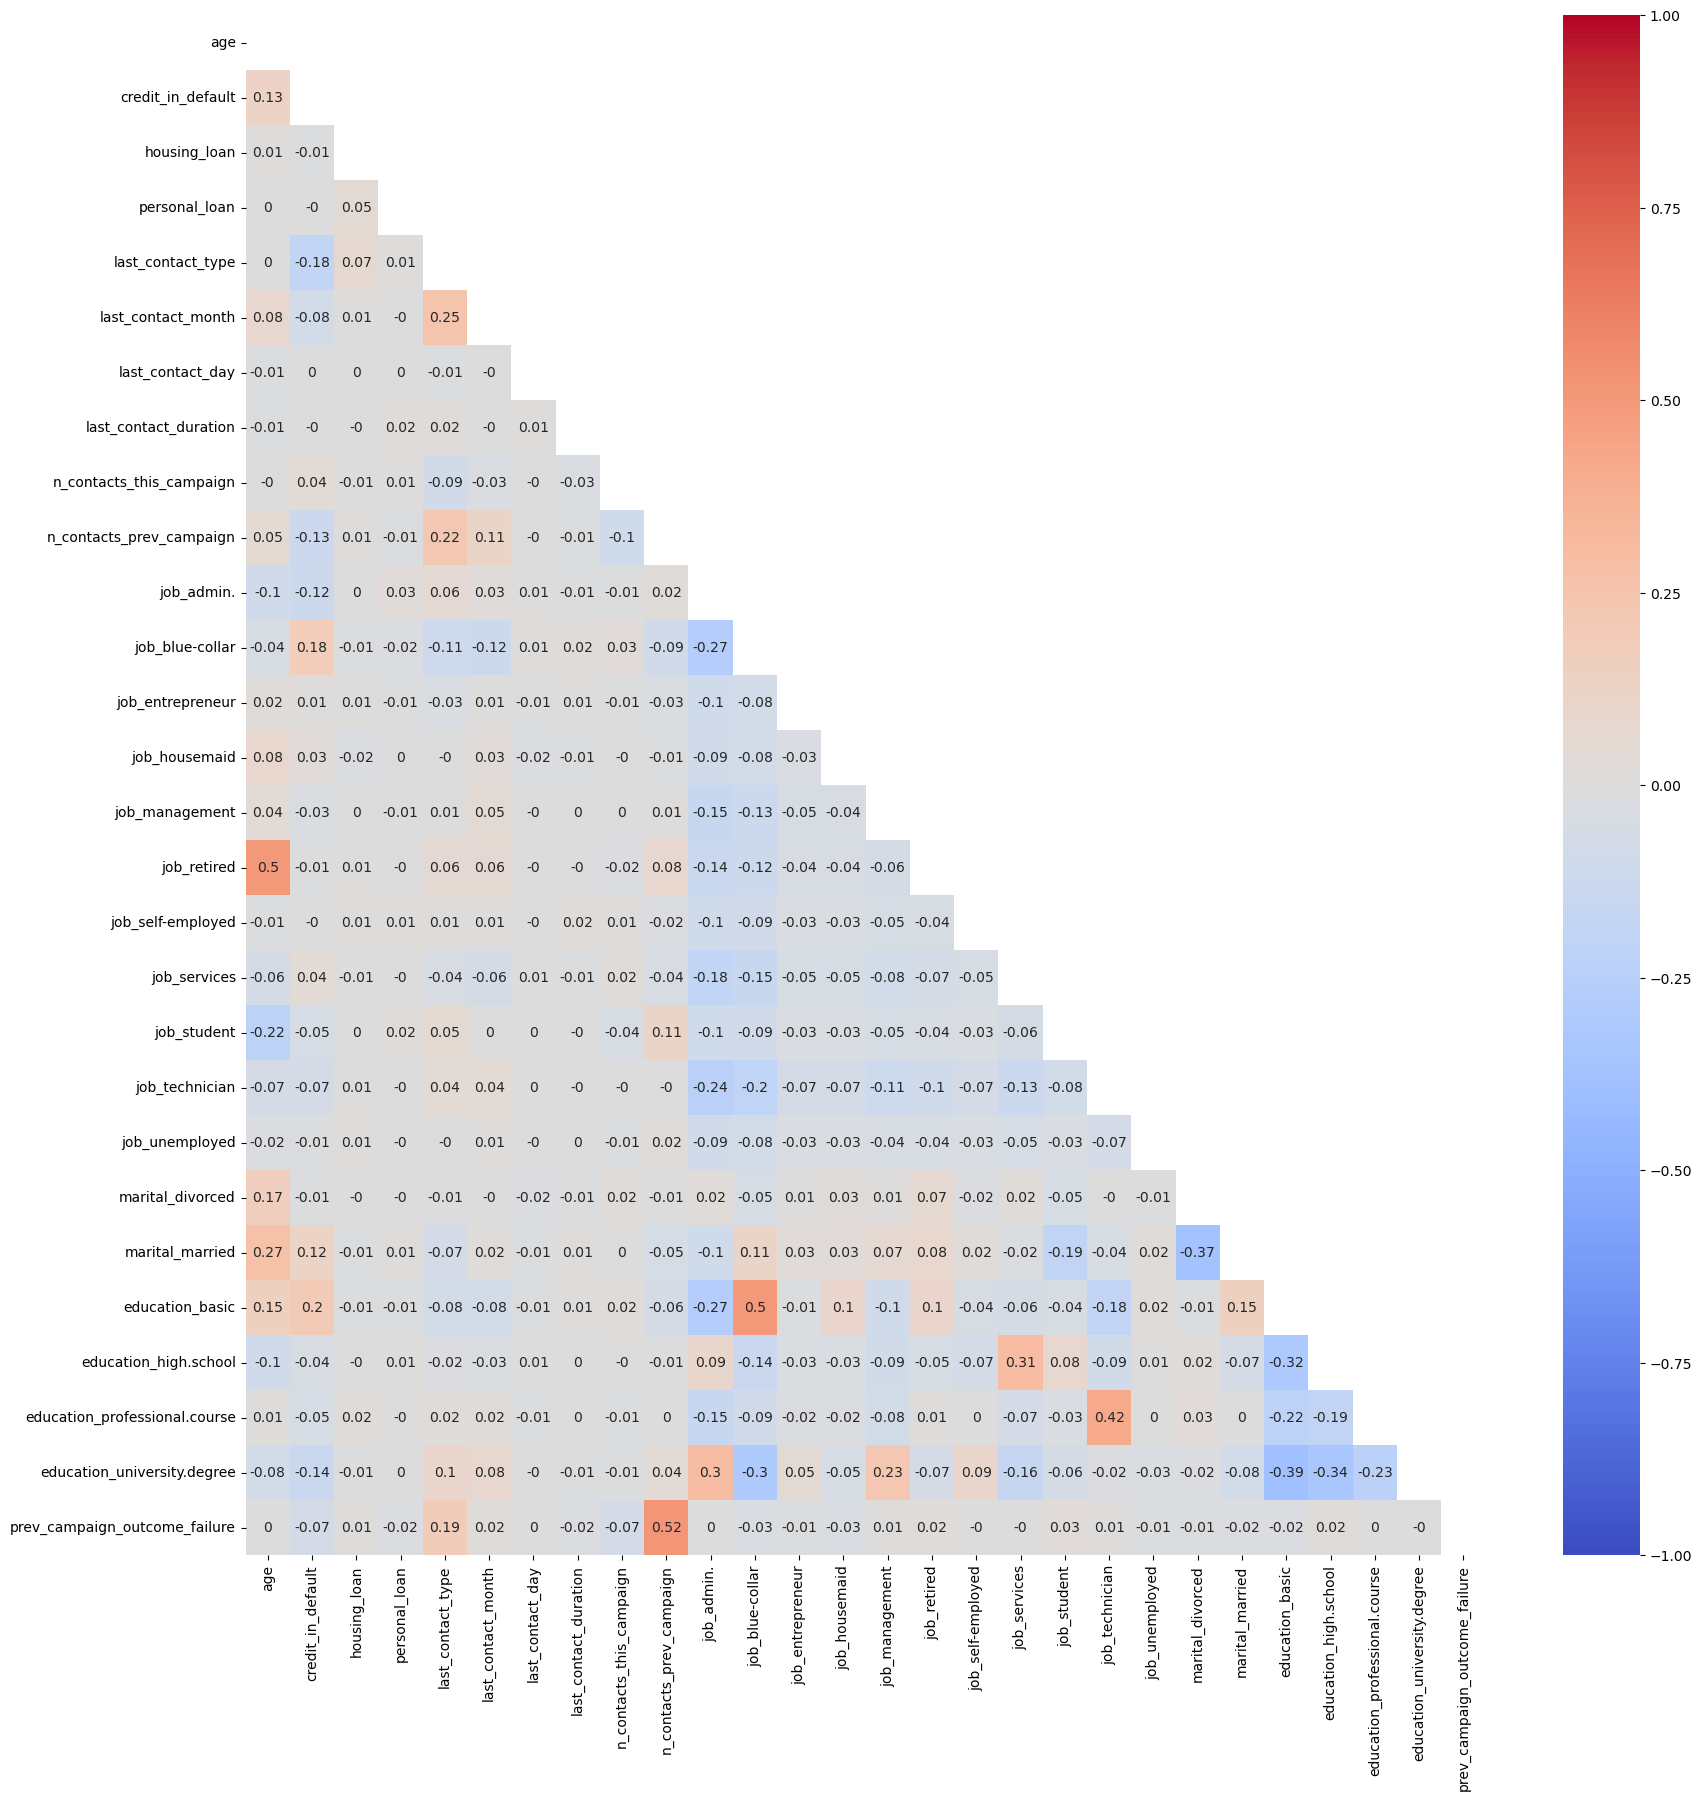

In [152]:
# Calculate all the correlations between each independent variables
corr_df = X.corr()

# Let's visulaize it

# Mask for upper-triangular
mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask, center=0)
plt.show()


#### Detecting Multicollinearity with the Variance Inflation Factors

Looking at correlations only won't detect multicollinearity, hence we need a new tool: the **Variance Inflation Factor** (VIF). 

In order to calculate it, we build a regression model of each independent variable against the other independent variables and look at the $R^2$ score. The VIF for each predictor is defined as 
$$
\text{VIF}_i = \frac{1}{1-R_i^2}
$$

In a perfect scenario of no multicollinearity, the VIF for each predictor should be 1 (since the $R^2$ from each model would be 0, showing that the given independent variable can't be modeled by the other variables, hence no linear relationship). 

By common convention, any VIF value higher than 5 indicates high multicollinearity. Let's examine the VIF for the variables in our dataset:

In [153]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
X_withcons = sm.add_constant(X)

In [156]:
X_withcons.head()

,const,age,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,...,job_student,job_technician,job_unemployed,marital_divorced,marital_married,education_basic,education_high.school,education_professional.course,education_university.degree,prev_campaign_outcome_failure
0,1.0,38.0,0,0,0,1,5,2,244.0,3,...,1,0,0,1,0,0,0,0,0,0
1,1.0,34.0,0,0,0,1,5,1,190.0,3,...,0,0,0,0,1,0,0,1,0,0
2,1.0,43.0,1,1,1,1,7,4,97.0,2,...,0,0,0,0,0,0,0,0,0,0
3,1.0,75.0,0,0,0,1,10,3,113.0,2,...,0,0,0,0,1,1,0,0,0,0
4,1.0,58.0,0,0,0,0,5,2,174.0,1,...,0,0,0,0,1,0,0,0,0,0


In [157]:
variance_inflation_factor(X_withcons.values, 1)

1.6958197677490956

In [159]:
pd.Series([variance_inflation_factor(X_withcons.values, i) for i in range(X_withcons.shape[1])], 
         index = X_withcons.columns)[1:]

age                              1.695820
credit_in_default                1.120707
housing_loan                     1.009723
personal_loan                    1.005856
last_contact_type                1.168666
last_contact_month               1.098466
last_contact_day                 1.003077
last_contact_duration            1.003763
n_contacts_this_campaign         1.017291
n_contacts_prev_campaign         1.465477
job_admin.                       3.702520
job_blue-collar                  3.394950
job_entrepreneur                 1.390761
job_housemaid                    1.351140
job_management                   1.956504
job_retired                      2.061000
job_self-employed                1.432799
job_services                     2.200413
job_student                      1.559539
job_technician                   2.995337
job_unemployed                   1.342823
marital_divorced                 1.296038
marital_married                  1.425261
education_basic                  2

A VIF score of above 5 is an indication of multi collinearity. Since in our example all of the VIF scores are below 5, we are good with multi collinearity. 

#### Variable Selection

You will hopefully find that some combinations of variables will give almost the same performance using fewer predictors and hence, less multicollinearity. 


Even if there isn't any collinearity or multicollinearity present, it's common to try and find a simpler model that will have almost the same performance as a more complicated model. This is usually done by adding or removing variables until all are significant (p-value < 0.05). 

The technical term for this is called variable selection. In fact there's a few way to do this, some of which are: 

- **Forward Selection**: Starting with the intercept only, at each step, select the candidate variable that increases R-Squared the most.

- **Backward Selection**: Starting with a full model (all predictors), at each step, the variable that is the least significant is removed. In the case of multicollinearity, the variable removed may be the one with the highest VIF scores. 

- **Stepwise Selection**: Combination of the above two, after each step in which a predictor was added, all predictor candidates in the model are checked to see if their significance has been reduced below a p-value of 0.05.


#### Forward Feature Selection

The following diagram demonstrates the forward selection approach:

<img src="https://drive.google.com/uc?export=view&id=19RfhvLdwjnlps_Kx4qMZWrpJQab_E2Hi" alt="Backward Selection" width="600" height="700"/>


#### Backward Feature Selection

The backward selection approach can be imagined as this:

<img src="https://drive.google.com/uc?export=view&id=1HbSW65W_tZR6N5wCFDTtsabYwDSAT3QP" alt="Backward Selection" width="600" height="700"/>

Let's start the feature selection process with our data set now:

### Part 4: Model Evaluation & Summary

We've made some models, now let's try to interpret them and summarize our findings.

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>